# Import Libraries

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [68]:
from sklearn.preprocessing import StandardScaler 

In [6]:
from sklearn.datasets import load_boston

# Import Dataset

In [10]:
boston=load_boston()

In [11]:
type(boston)

sklearn.utils.Bunch

In [12]:
boston.keys()   #DESCR:description

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [16]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [17]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [18]:
boston.feature_names  #columns name

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [19]:
boston.target  #price(our dependent variable)

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Making ready to data:

In [23]:
df=pd.DataFrame(boston.data,columns=boston.feature_names)

In [24]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [25]:
df['price']=boston.target

In [26]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [32]:
df.shape

(506, 14)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [33]:
#summarizing data stat
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Data Cleaning

In [29]:
#checking for null value
df.isnull().sum() 

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [35]:
#checking fro duplicate value
df.duplicated().sum()

0

# EDA

<AxesSubplot:>

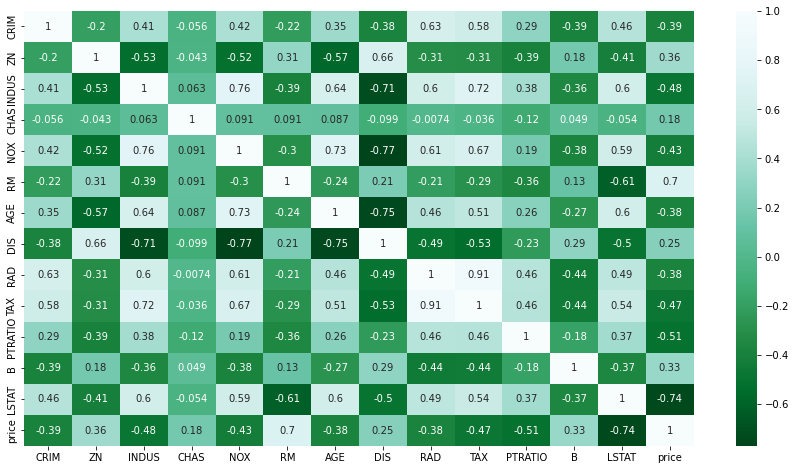

In [40]:
#correlation
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap='BuGn_r')

Text(0.5, 1.0, 'Scatter plot between crime and price')

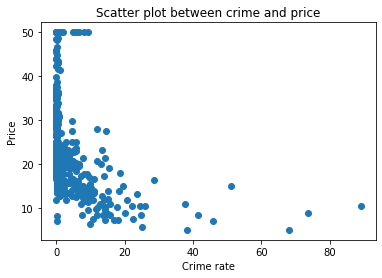

In [47]:
plt.scatter(df['CRIM'],df['price'])
plt.xlabel('Crime rate')
plt.ylabel('Price')
plt.title("Scatter plot between crime and price")


***Observation***:
1)Increase in crime rate cause decrease the price rate of house

Text(0.5, 1.0, 'Scatter plot between crime and Avg.no.of rooms')

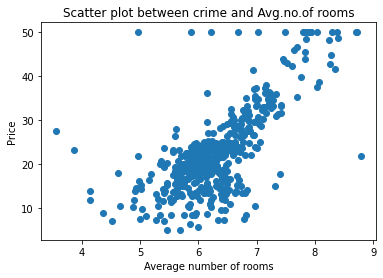

In [49]:
plt.scatter(df['RM'],df['price'])
plt.xlabel('Average number of rooms')
plt.ylabel('Price')
plt.title("Scatter plot between crime and Avg.no.of rooms")


***Observation****:
    1)As Number of rooms increasing ,price also increasing

Text(0.5, 1.0, 'Scatter plot between crime and % of lower status of pop')

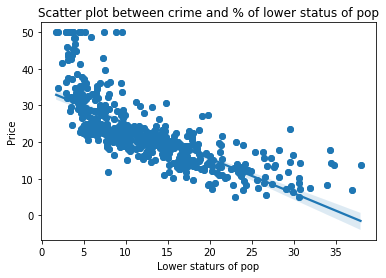

In [55]:
plt.scatter(df['LSTAT'],df['price'])
sns.regplot(df['LSTAT'],df['price'],data=df)
plt.xlabel('Lower staturs of pop')
plt.ylabel('Price')
plt.title("Scatter plot between crime and % of lower status of pop")


Text(0.5, 1.0, 'Scatter plot between crime and people-teacher ratio')

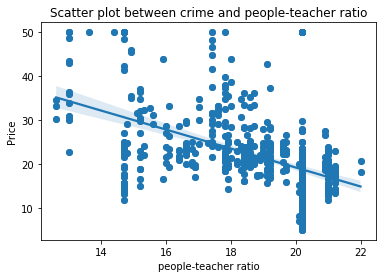

In [57]:
plt.scatter(df['PTRATIO'],df['price'])
sns.regplot(df['PTRATIO'],df['price'],data=df)
plt.xlabel('people-teacher ratio')
plt.ylabel('Price')
plt.title("Scatter plot between crime and people-teacher ratio")


***Observation***:
people -teacher ratio increasing,price is decreasing

# Data splitting

In [58]:
#independent and dependent variable
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [63]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [67]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(354, 13)
(152, 13)
(354,)
(152,)


# Feature Scaling

In [69]:
scaler=StandardScaler()


In [70]:
x_train=scaler.fit_transform(x_train)

In [71]:
x_test=scaler.transform(x_test)

# Model building

In [76]:
regression=LinearRegression()

In [77]:
regression.fit(x_train,y_train)

LinearRegression()

In [80]:
#print intercepth and coefficient
print("Coefficient",regression.coef_)

print('\n\n')

print("Intercept",regression.intercept_)

Coefficient [-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]



Intercept 23.01581920903955


In [83]:
#Which parameter 
regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [84]:
#predict y based on x_train
y_train_pred=regression.predict(x_train)

In [87]:
#predict y based on x_test
y_test_pred=regression.predict(x_test)

<AxesSubplot:xlabel='price'>

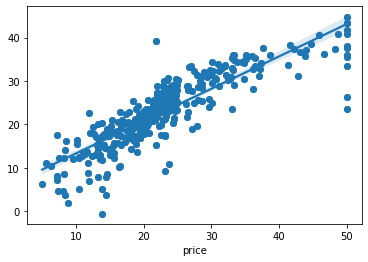

In [91]:
#scatter plot of training data
plt.scatter(y_train,y_train_pred)
sns.regplot(y_train,y_train_pred)

<AxesSubplot:xlabel='price'>

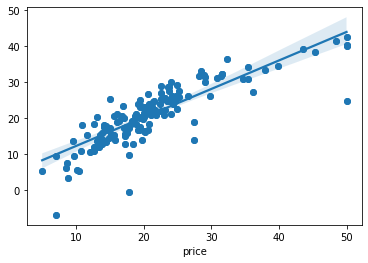

In [89]:
#Scatter plot of testing data
plt.scatter(y_test,y_test_pred)
sns.regplot(y_test,y_test_pred)

***Your model is linear ...hence amount of information it has***

In [92]:
#Residual
residual=y_test-y_test_pred
residual

173    -5.048960
274    -4.095014
491    -1.811193
72     -2.603213
452    -2.755280
         ...    
441    -0.303672
23      1.114059
225    10.016575
433    -2.382863
447    -5.685618
Name: price, Length: 152, dtype: float64

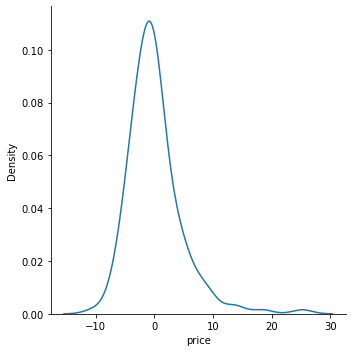

In [94]:
#Plot residuals
sns.displot(residual,kind='kde')

***Observations***:
From this graph, The distribution of erros are normal but there is some outlier

# Evalution metrics

***Mean squared error,Mean absolute error,rmse,r2_score,adjusted r2_score***

In [100]:
#For training dataset
print("mean_squared_error",mean_squared_error(y_train,y_train_pred))
print("mean_absolute_error",mean_absolute_error(y_train,y_train_pred))
print("mean_squared_error",np.sqrt(mean_squared_error(y_train,y_train_pred)))

mean_squared_error 22.545481487421426
mean_absolute_error 3.3568267821682056
mean_squared_error 4.748208239685937


In [101]:
#For testing dataset
print("mean_squared_error",mean_squared_error(y_test,y_test_pred))
print("mean_absolute_error",mean_absolute_error(y_test,y_test_pred))
print("mean_squared_error",np.sqrt(mean_squared_error(y_test,y_test_pred)))

mean_squared_error 21.51744423117721
mean_absolute_error 3.1627098714574053
mean_squared_error 4.6386899261728205


Formula:
    ***R^2=1-SSR/SST***
    
    **R^2=coefficient of determination**
    
    **SSR:Sum of squares of residuals**
        
    **SST:Total sum of squares**

In [110]:
score1=r2_score(y_train,y_train_pred)
score2=r2_score(y_test,y_test_pred)
print("R2 score of training data",score1)
print("R2 score of testing data",score2)

R2 score of training data 0.7434997532004697
R2 score of testing data 0.7112260057484932


 ***Adjusted R score***
 =1-[(1-R^2)*(n-1)/(n-k-1)]

n:number of obsevations
k:no.of features in predicator(independent variable)

In [117]:
#Adjusted R for train data
1-(1-score1)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)

0.7336923908228405

In [115]:
#Adjusted R for test data
1-(1-score2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6840226584639308

***Conclusion***:It is not bad accuracy

# New prediction:

In [122]:
boston.data[0].reshape(1,-1)

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [125]:
#transform new data
scaler.transform(boston.data[0].reshape(1,-1))

array([[-0.41709233,  0.29216419, -1.27338003, -0.28154625, -0.16513629,
         0.34715902, -0.13030059,  0.15267164, -0.97798895, -0.66777595,
        -1.32142483,  0.42854113, -1.04769976]])

In [128]:
regression.predict(scaler.transform(boston.data[0].reshape(1,-1)))

array([30.08649576])

# Pickle the File for deployment:

In [129]:
import pickle

In [130]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [131]:
#to load pickle
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [132]:
#prediction
pickled_model.predict(scaler.transform(boston.data[0].reshape(1,-1)))

array([30.08649576])